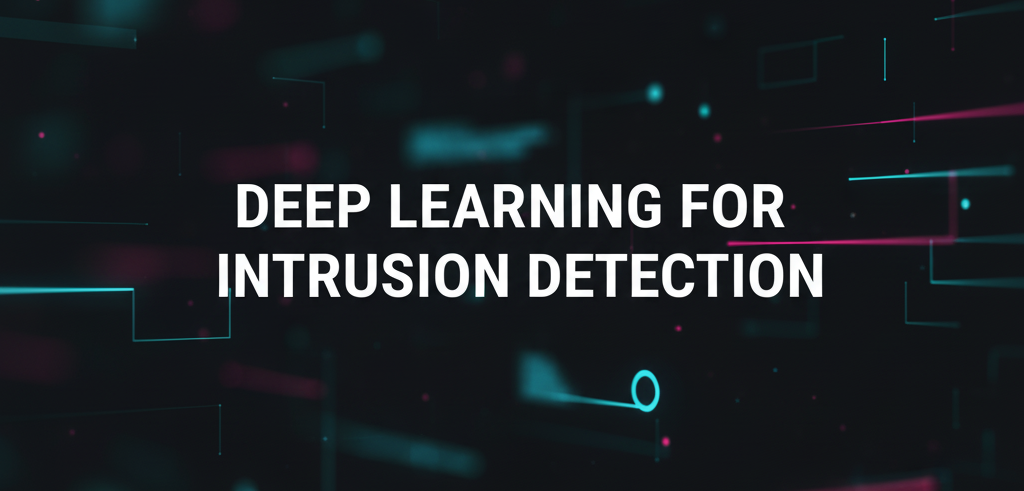



## ***I. Project Overview***

This project focuses on building and evaluating robust Machine Learning models for an Intrusion Detection System (IDS) using a large-scale cybersecurity dataset (likely CICIDS2017 or a similar traffic flow benchmark). Our goal is to perform a two-stage classification:

***Stage 1*** (Binary Classification): Distinguish between Benign (Class 0) traffic and Any Intrusion/Attack (Class 1). This forms the basis of our initial model evaluation.

***Stage 2*** (Multi-Class Classification): Identify the specific type of attack (e.g., Denial of Service, Port Scan, Brute Force).

## ***II. The Core Challenges***

### ***Severe Class Imbalance***

The dataset exhibits a significant class imbalance in the binary problem, with Benign traffic ( 85% of samples) heavily outweighing the Attack traffic ( 15%of samples). This imbalance is critical because a model can achieve deceptively high overall accuracy simply by predicting "Benign" most of the time. Therefore, we prioritize the F1-score for the minority (Attack) class as our key performance metric.

## ***III. Revised Concluding Statement:***

Our analysis proceeds by first establishing a rigorous data preprocessing pipeline, with an emphasis on preventing the data leakage identified during initial runs. Following this, we perform a comparative deep-dive into the performance and reliability of three distinct models (Logistic Regression, Random Forest, and XGBoost) on the Binary Classification task. The final phase of the project involves selecting the most robust and generalized model, XGBoost, and adapting its architecture and tuning strategy to successfully handle the critical multi-class classification challenge.


# ***0 Setting environment***

In [ ]:
!pip uninstall -y scikit-learn imbalanced-learn
!rm -rf /usr/local/lib/python3.*/dist-packages/sklearn
!rm -rf /usr/local/lib/python3.*/dist-packages/imblearn


In [ ]:
!pip install scikit-learn==1.2.2 imbalanced-learn==0.9.1 --quiet

In [ ]:
pip install "numpy>=2.0,<3.0" "scikit-learn>=1.3.1"


In [2]:
!pip install imbalanced-learn==0.10.1 --no-deps


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.2 MB/s eta 0:00:0000:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [ ]:
!pip list

In [3]:
import sklearn
try:
    import imblearn
    imblearn_version = imblearn.__version__
except ImportError:
    imblearn_version = "Not installed"

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn_version)


scikit-learn version: 1.2.2
imbalanced-learn version: 0.10.1


In [ ]:
# !pip install imbalanced-learn==0.12.2 --force-reinstall
# !pip install --upgrade pip

In [4]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 61.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.2 which is incompatible.


In [5]:
!pip install scikit-learn==1.5.0 --no-deps


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 81.5 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalling scikit-learn-1.7.2:
      Successfully uninstalled scikit-learn-1.7.2


In [ ]:
# !pip install --upgrade pip

In [ ]:
!pip install imbalanced-learn==0.9.1 --quiet

In [ ]:
# !pip install --upgrade pip

In [6]:
!pip install xgboost


In [ ]:
!pip install --upgrade --force-reinstall scikit-learn

In [8]:
!pip install scikit-learn==1.2.2 --no-deps


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 56.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.0
    Uninstalling scikit-learn-1.5.0:
      Successfully uninstalled scikit-learn-1.5.0


In [9]:
import numpy as np
import pandas as pd
import os
from glob import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2025-11-09 16:42:09.988117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762706530.463530      61 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762706530.599702      61 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# ***1.Data prepration***

In [10]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cicids2017/Benign-Monday-no-metadata.parquet
/kaggle/input/cicids2017/Bruteforce-Tuesday-no-metadata.parquet
/kaggle/input/cicids2017/Portscan-Friday-no-metadata.parquet
/kaggle/input/cicids2017/WebAttacks-Thursday-no-metadata.parquet
/kaggle/input/cicids2017/DoS-Wednesday-no-metadata.parquet
/kaggle/input/cicids2017/DDoS-Friday-no-metadata.parquet
/kaggle/input/cicids2017/Infiltration-Thursday-no-metadata.parquet
/kaggle/input/cicids2017/Botnet-Friday-no-metadata.parquet


In [11]:
df_data_1 = pd.read_parquet('/kaggle/input/cicids2017/Benign-Monday-no-metadata.parquet')
df_data_2 = pd.read_parquet('/kaggle/input/cicids2017/Bruteforce-Tuesday-no-metadata.parquet')
df_data_3 = pd.read_parquet('/kaggle/input/cicids2017/Portscan-Friday-no-metadata.parquet')
df_data_4 = pd.read_parquet('/kaggle/input/cicids2017/WebAttacks-Thursday-no-metadata.parquet')
df_data_5 = pd.read_parquet('/kaggle/input/cicids2017/DoS-Wednesday-no-metadata.parquet')
df_data_6 = pd.read_parquet('/kaggle/input/cicids2017/DDoS-Friday-no-metadata.parquet')
df_data_7 = pd.read_parquet('/kaggle/input/cicids2017/Infiltration-Thursday-no-metadata.parquet')
df_data_8 = pd.read_parquet('/kaggle/input/cicids2017/Botnet-Friday-no-metadata.parquet')

In [12]:
df_data = pd.concat([df_data_1, df_data_2, df_data_3, df_data_4, 
                     df_data_5, df_data_6, df_data_7, df_data_8], axis=0, ignore_index=True)

 # **1.1Preprocessing**

In [13]:
df_numeric = df_data.select_dtypes(include=[np.number])

infinity_counts = np.isinf(df_numeric).sum()

infinity_counts

Protocol                    0
Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
                           ..
Active Min                  0
Idle Mean                   0
Idle Std                    0
Idle Max                    0
Idle Min                    0
Length: 77, dtype: int64

In [15]:
df_data.isnull().sum().sum()

0

In [16]:
df_numeric =df_numeric.replace([np.inf, -np.inf], np.nan)
df_numeric = df_numeric.dropna()

In [19]:
df_data.duplicated().sum()

0

In [18]:
df_data = df_data.drop_duplicates()

In [20]:
X = df_data.copy()
X = X.drop(columns='Label') 
y = df_data["Label"].copy()
y_b = y.map({'Benign': 0}).fillna(1).astype(int).rename('Label')


In [21]:
df_binary = X.copy()
df_binary['Label'] = y_b

# ***1.2 EDA***

## ***1.2.1 For all dataset***

In [22]:
 df_data.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,4,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,6,1,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,6,3,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,6,1,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,6,609,7,4,484,414,233,0,69.14286,111.967896,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [23]:
print(df_data.columns.tolist())

['Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ra

In [24]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2231806 entries, 0 to 2313809
Data columns (total 78 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Protocol                  int8   
 1   Flow Duration             int32  
 2   Total Fwd Packets         int32  
 3   Total Backward Packets    int32  
 4   Fwd Packets Length Total  int32  
 5   Bwd Packets Length Total  int32  
 6   Fwd Packet Length Max     int16  
 7   Fwd Packet Length Min     int16  
 8   Fwd Packet Length Mean    float32
 9   Fwd Packet Length Std     float32
 10  Bwd Packet Length Max     int16  
 11  Bwd Packet Length Min     int16  
 12  Bwd Packet Length Mean    float32
 13  Bwd Packet Length Std     float32
 14  Flow Bytes/s              float64
 15  Flow Packets/s            float64
 16  Flow IAT Mean             float32
 17  Flow IAT Std              float32
 18  Flow IAT Max              int32  
 19  Flow IAT Min              int32  
 20  Fwd IAT Total             int

## ***1.2.2 Binary class***

In [25]:
df_binary['Label'].value_counts()

Label
0    1895314
1     336492
Name: count, dtype: int64

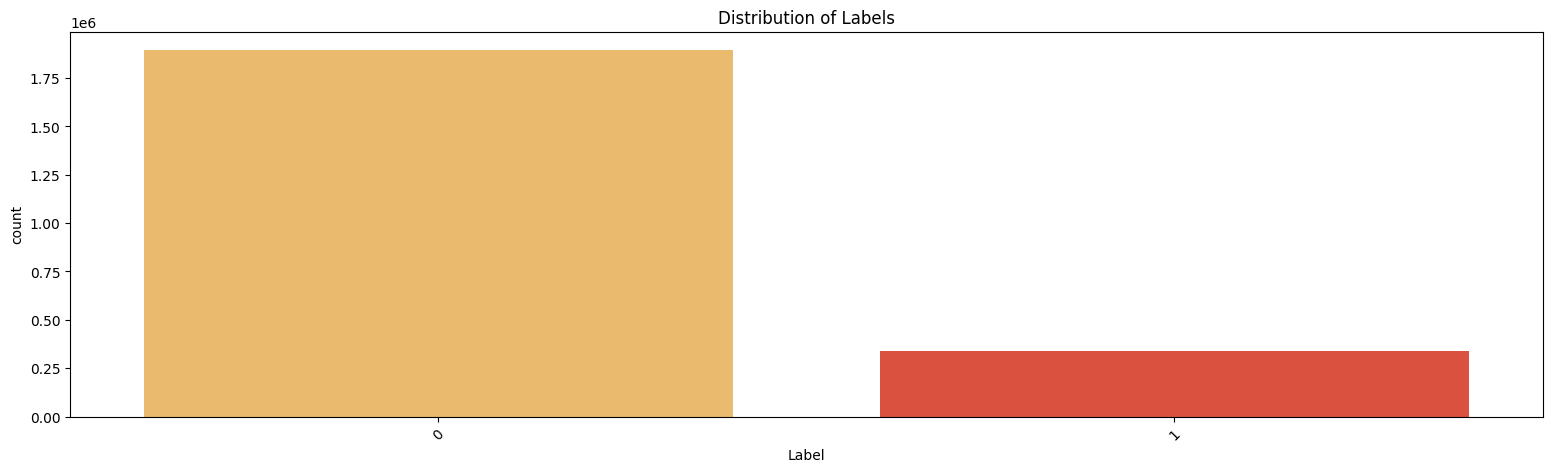

In [26]:
plt.figure(figsize=(19,5))
sns.countplot(x=df_binary['Label'], palette="YlOrRd")
plt.title("Distribution of Labels")
plt.xticks(rotation=45)
plt.show()

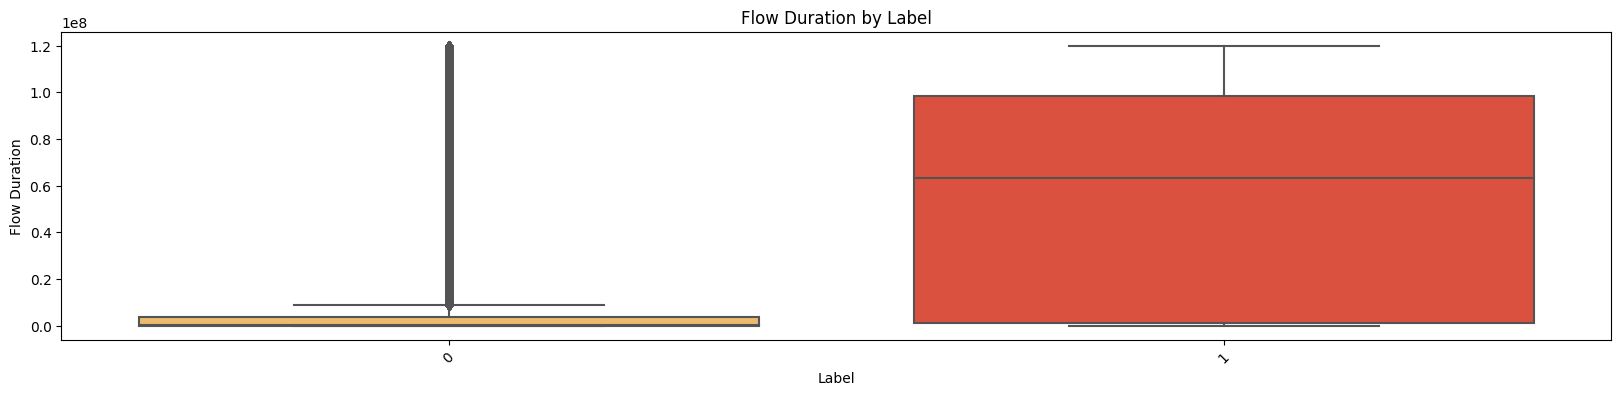

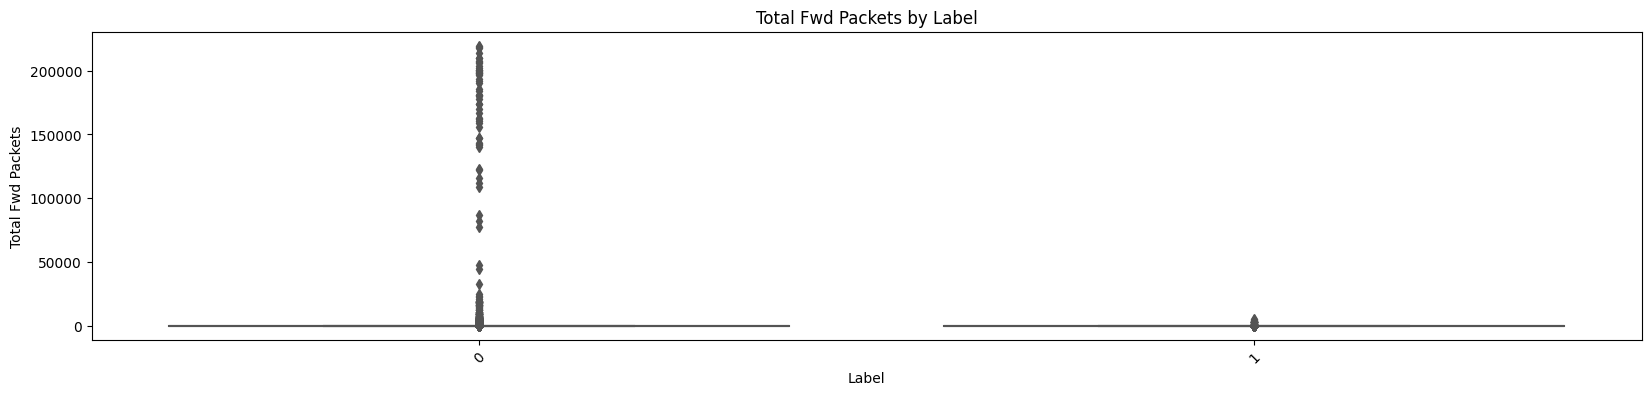

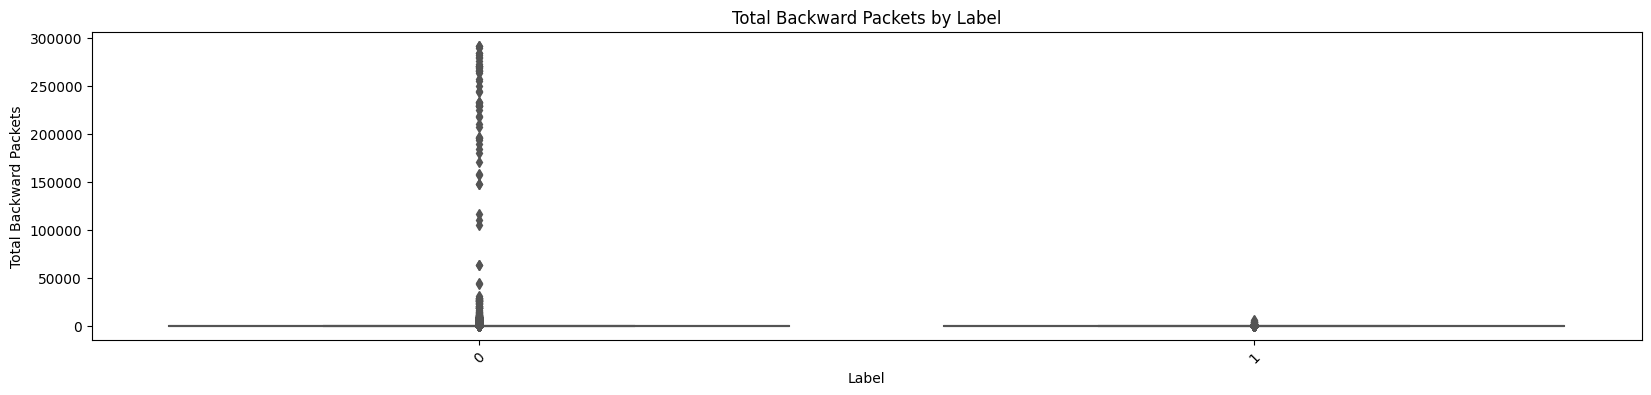

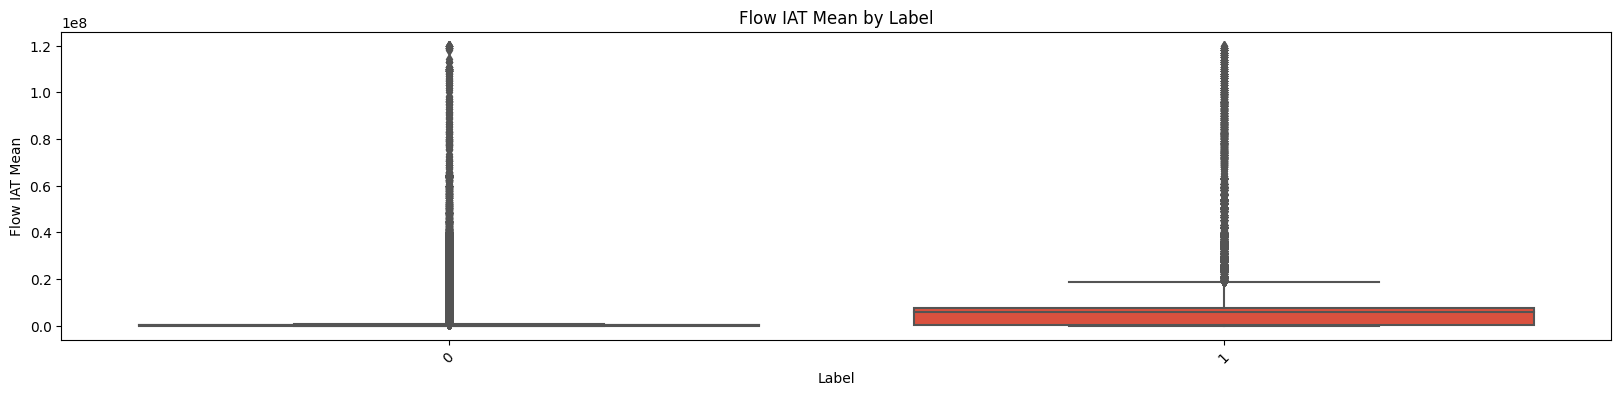

In [27]:
features_to_plot = ['Flow Duration','Total Fwd Packets','Total Backward Packets','Flow IAT Mean']
for feat in features_to_plot:
    plt.figure(figsize=(20,4))
    sns.boxplot(x='Label', y=feat, data=df_binary,palette="YlOrRd")
    plt.title(f'{feat} by Label')
    plt.xticks(rotation=45)
    plt.show()


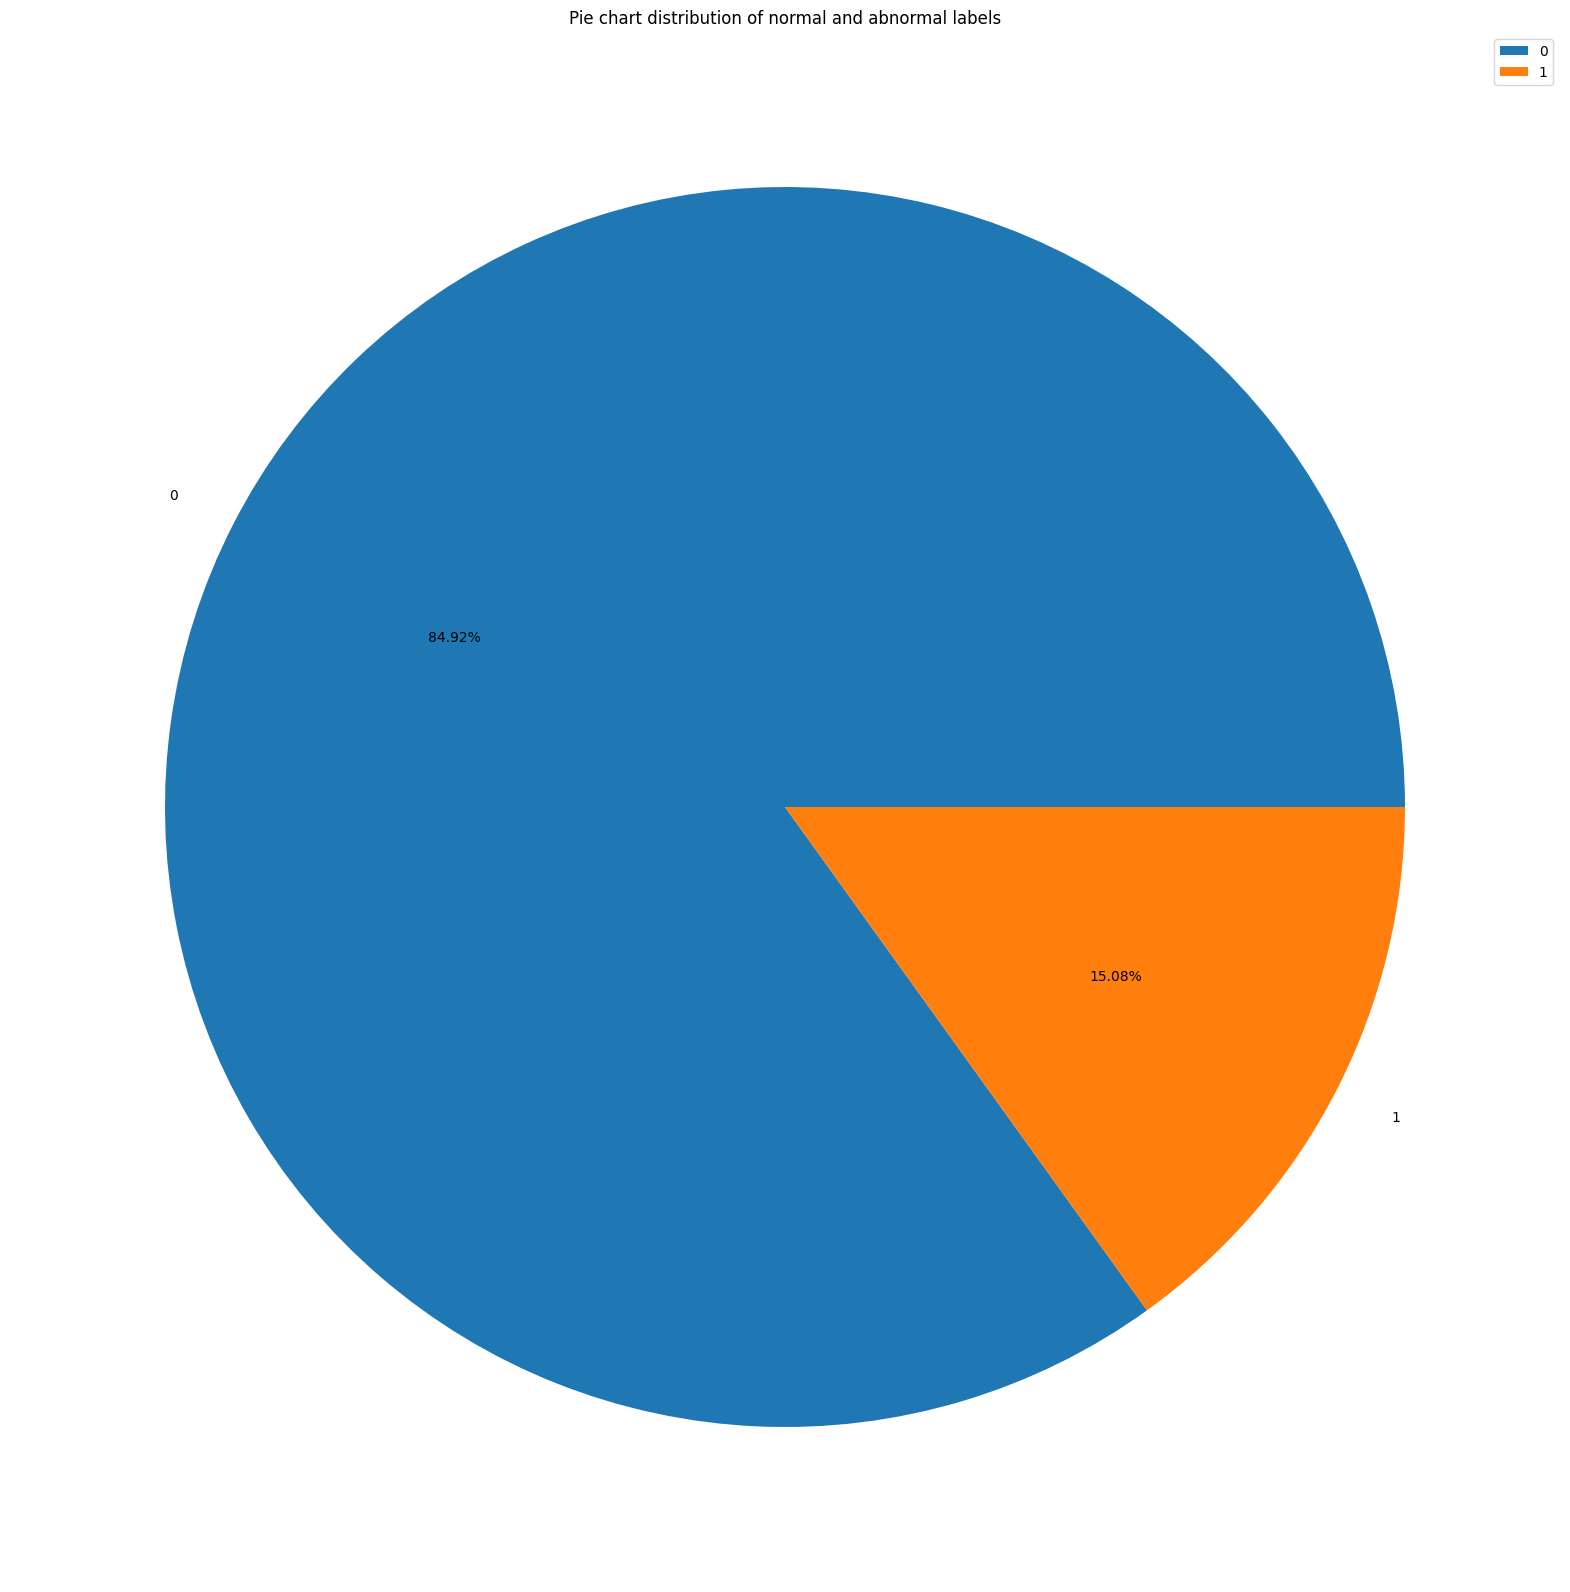

In [28]:
plt.figure(figsize=(20,30))
plt.pie(df_binary['Label'].value_counts(),labels=df_binary['Label'].unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()


## ***1.2.3 Multiclass***

In [29]:
df_data['Label'].value_counts()

Label
Benign                        1895314
DoS Hulk                       172846
DDoS                           128014
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
PortScan                         1956
Web Attack � Brute Force         1470
Bot                              1437
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [30]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Protocol,2231806.0,1.047114e+01,5.409536e+00,0.0,6.0,6.0,17.00,17.0
Flow Duration,2231806.0,1.873981e+07,3.690288e+07,-13.0,2037.0,77109.5,6055696.75,119999998.0
Total Fwd Packets,2231806.0,1.142387e+01,8.442820e+02,1.0,2.0,2.0,7.00,219759.0
Total Backward Packets,2231806.0,1.296894e+01,1.123261e+03,0.0,1.0,2.0,6.00,291922.0
Fwd Packets Length Total,2231806.0,6.886546e+02,1.125057e+04,0.0,39.0,74.0,365.00,12900000.0
...,...,...,...,...,...,...,...,...
Active Min,2231806.0,7.394033e+04,6.490405e+05,0.0,0.0,0.0,1.00,110000000.0
Idle Mean,2231806.0,1.054639e+07,2.630308e+07,0.0,0.0,0.0,5132033.00,120000000.0
Idle Std,2231806.0,6.390577e+05,5.156686e+06,0.0,0.0,0.0,0.00,76900000.0
Idle Max,2231806.0,1.102800e+07,2.696824e+07,0.0,0.0,0.0,5132054.25,120000000.0


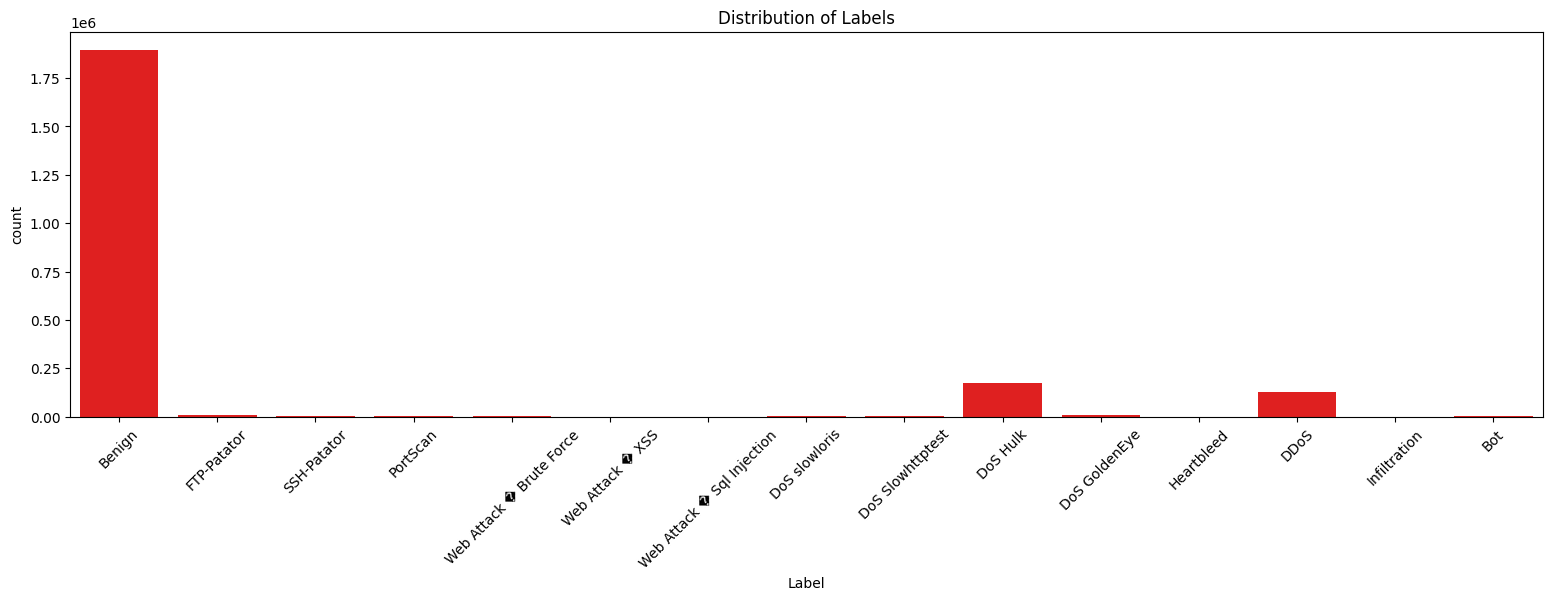

In [31]:
plt.figure(figsize=(19,5))
sns.countplot(x=df_data['Label'], color="red")
plt.title("Distribution of Labels")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


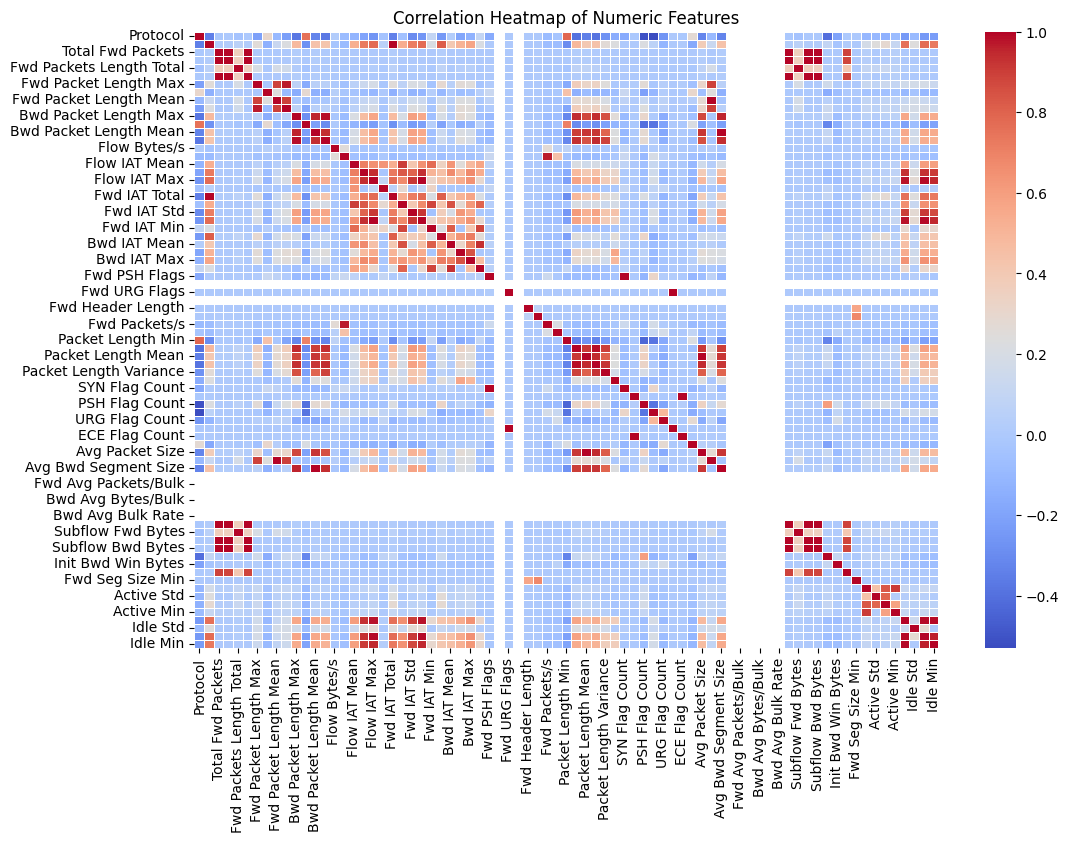

In [32]:
plt.figure(figsize=(12,8))
corr = df_numeric.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5,)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


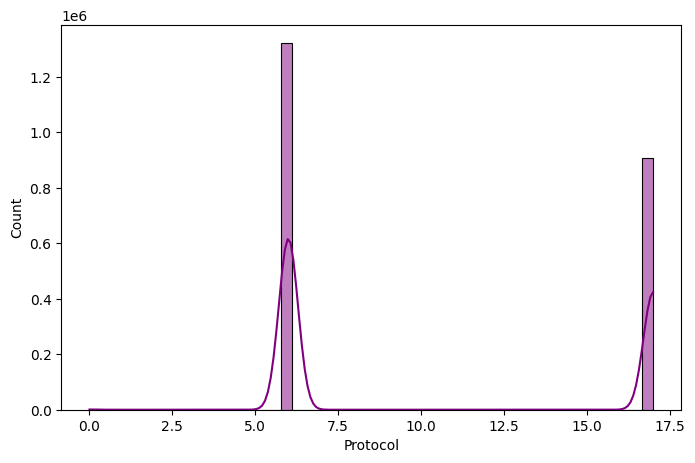

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df_data['Protocol'], bins=50, kde=True, color="purple")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


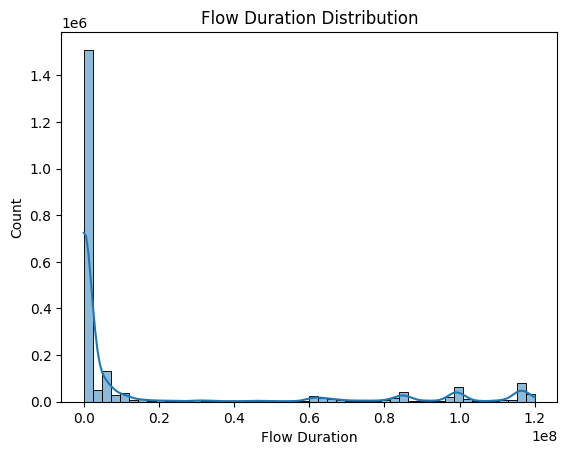

In [34]:
sns.histplot(df_data['Flow Duration'], bins=50, kde=True)
plt.title("Flow Duration Distribution")
plt.show()

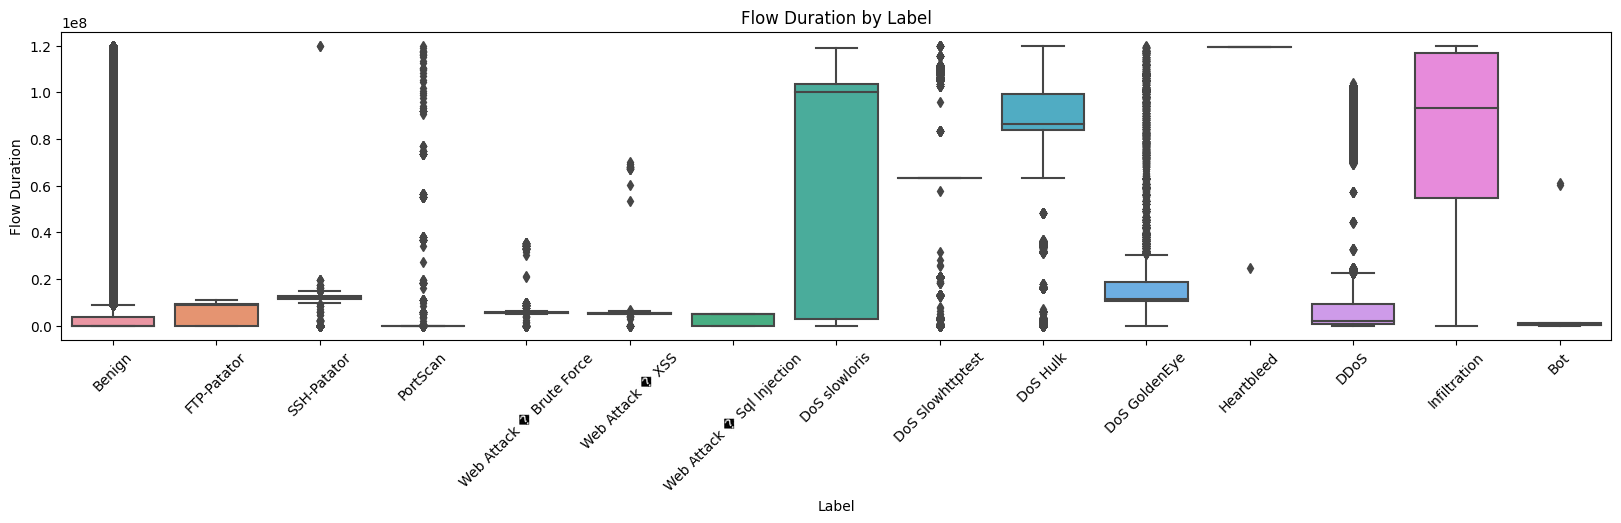

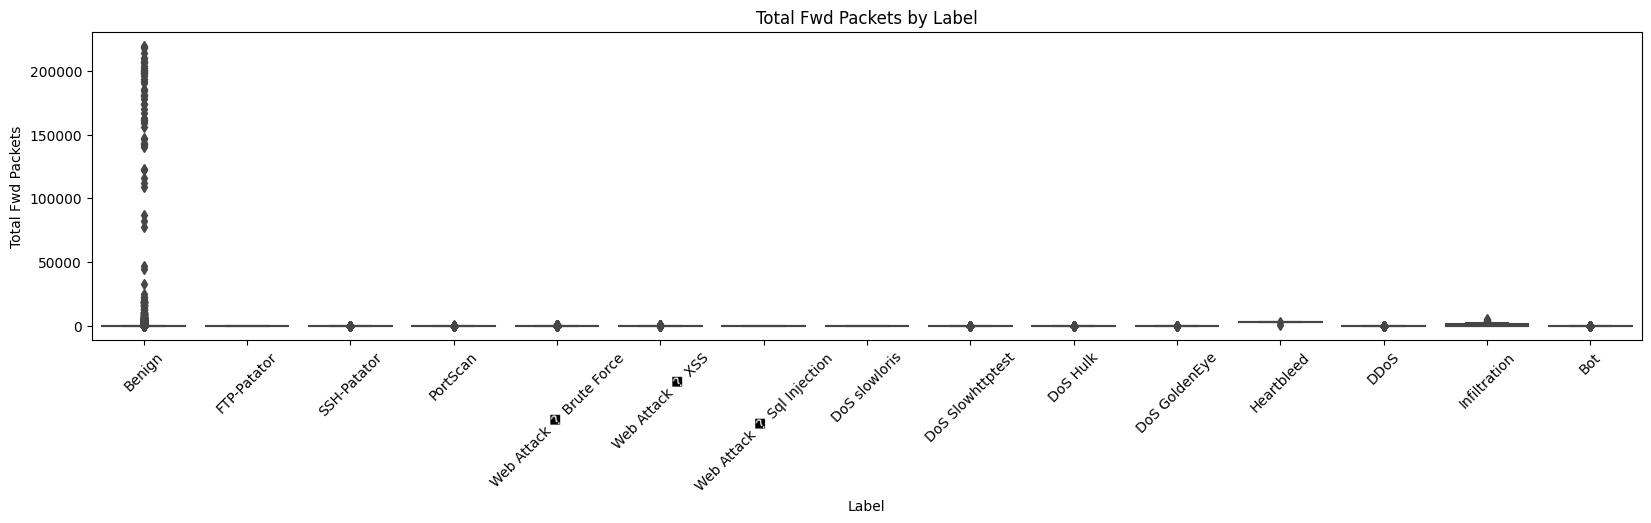

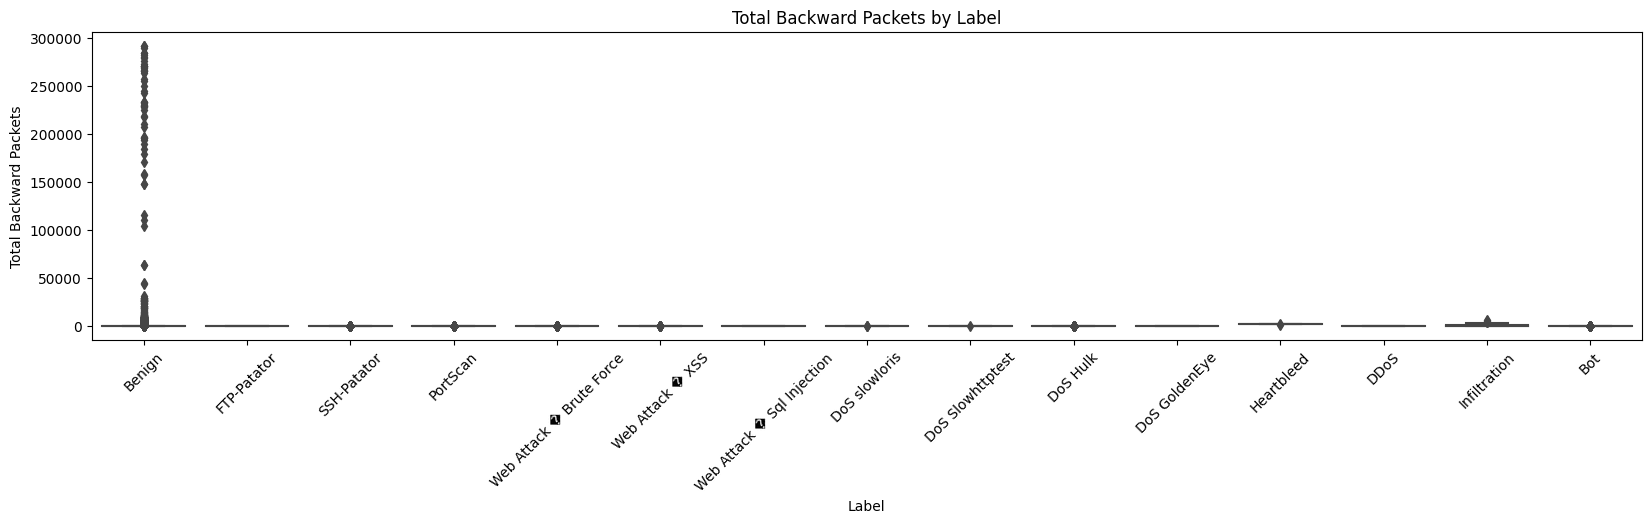

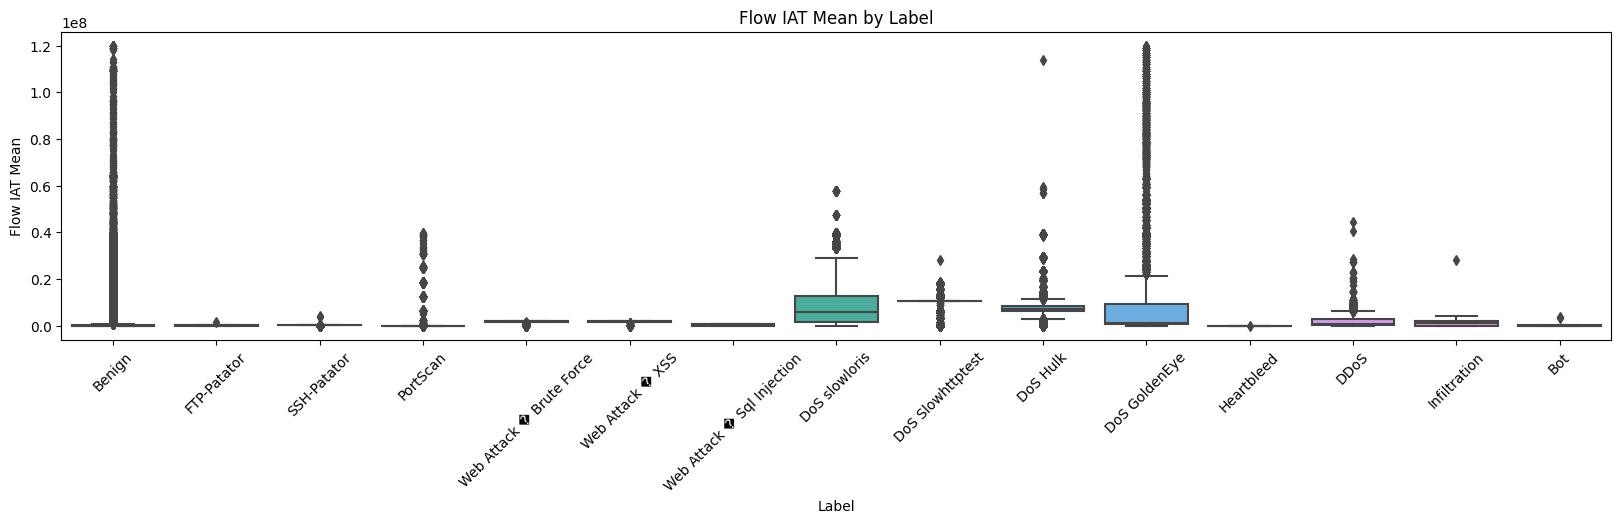

In [35]:
features_to_plot = ['Flow Duration','Total Fwd Packets','Total Backward Packets','Flow IAT Mean']
for feat in features_to_plot:
    plt.figure(figsize=(20,4))
    sns.boxplot(x='Label', y=feat, data=df_data)
    plt.title(f'{feat} by Label')
    plt.xticks(rotation=45)
    plt.show()


# ***1.3 Grouping Labels***

In [36]:

threshold = 1300  

counts = df_data['Label'].value_counts()

other_classes = counts[counts < threshold].index
df_data['Label'] = df_data['Label'].apply(lambda x: 'Other' if x in other_classes else x)


print(df_data['Label'].value_counts())


Label
Benign                      1895314
DoS Hulk                     172846
DDoS                         128014
DoS GoldenEye                 10286
FTP-Patator                    5931
DoS slowloris                  5385
DoS Slowhttptest               5228
SSH-Patator                    3219
PortScan                       1956
Web Attack � Brute Force       1470
Bot                            1437
Other                           720
Name: count, dtype: int64


In [37]:
X = df_data.copy()
X = X.drop(columns='Label') 
y = df_data["Label"].copy()

# ***1.4 Encoder***

In [38]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_m =y_encoded

# ***1.5 Split Data***

## ***1.5.1 Binary classificatin***

In [42]:
x_train_b,x_temp_b,y_train_b,y_temp_b=train_test_split(X,y_b,
                                                       stratify=y_b
                                                       ,test_size=0.3 
                                                       ,random_state=42)

x_val_b,x_test_b,y_val_b,y_test_b=train_test_split(x_temp_b,y_temp_b
                                                   ,stratify=y_temp_b
                                                   ,test_size=0.3
                                                   ,random_state=42)

## ***1.5.2 Multiclassification***

In [43]:
x_train,x_temp,y_train,y_temp=train_test_split(X,y_encoded
                                               ,stratify=y_encoded
                                               ,test_size=0.3 
                                               ,random_state=42)

x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp
                                           ,stratify=y_temp
                                           ,test_size=0.3 
                                           ,random_state=42)

# ***1.6 Feature engineering with XGboost***

## ***1.6.1 Binary class***

In [44]:
xgb_fs = XGBClassifier(
    n_estimators=50,       
    max_depth=3,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=0.5,
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_fs.fit(X, y_b)

importances = xgb_fs.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [45]:
selector = SelectFromModel(xgb_fs, threshold="median", prefit=True)

X_train_sel_b = selector.transform(x_train_b)
X_val_sel_b   = selector.transform(x_val_b)
X_test_sel_b  = selector.transform(x_test_b)

selected_features = x_train_b.columns[selector.get_support()]

X_trainb_sel_df = pd.DataFrame(X_train_sel_b, columns=selected_features)
X_valb_sel_df   = pd.DataFrame(X_val_sel_b, columns=selected_features)
X_testb_sel_df  = pd.DataFrame(X_test_sel_b, columns=selected_features)


print("Original feature count:", x_train.shape[1])
print("Reduced feature count:", X_train_sel_b.shape[1])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Original feature count: 77
Reduced feature count: 39


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


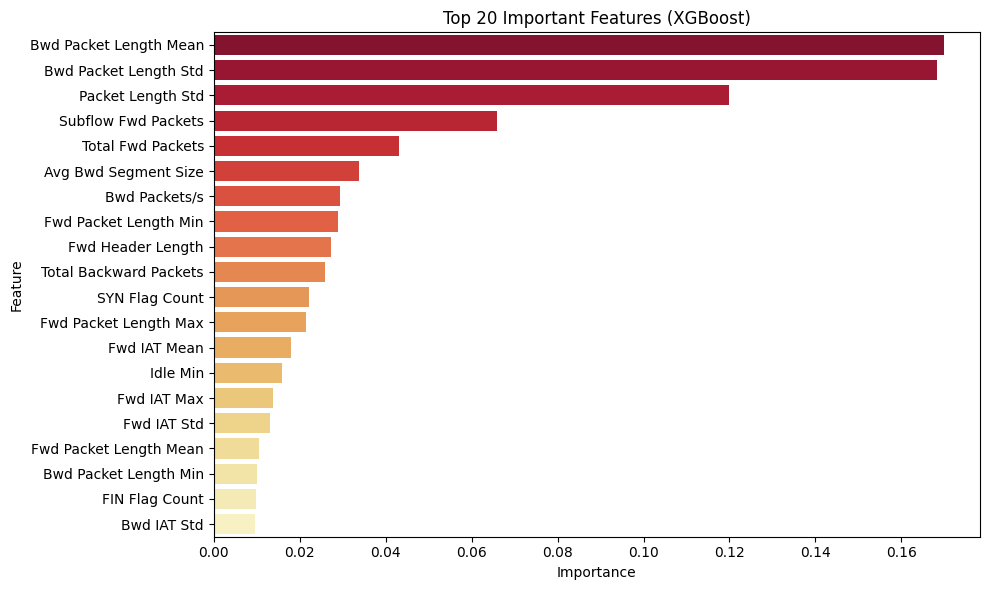

In [46]:
colors = sns.color_palette("YlOrRd", n_colors=20)[::-1] 

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20),palette=colors)
plt.title("Top 20 Important Features (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

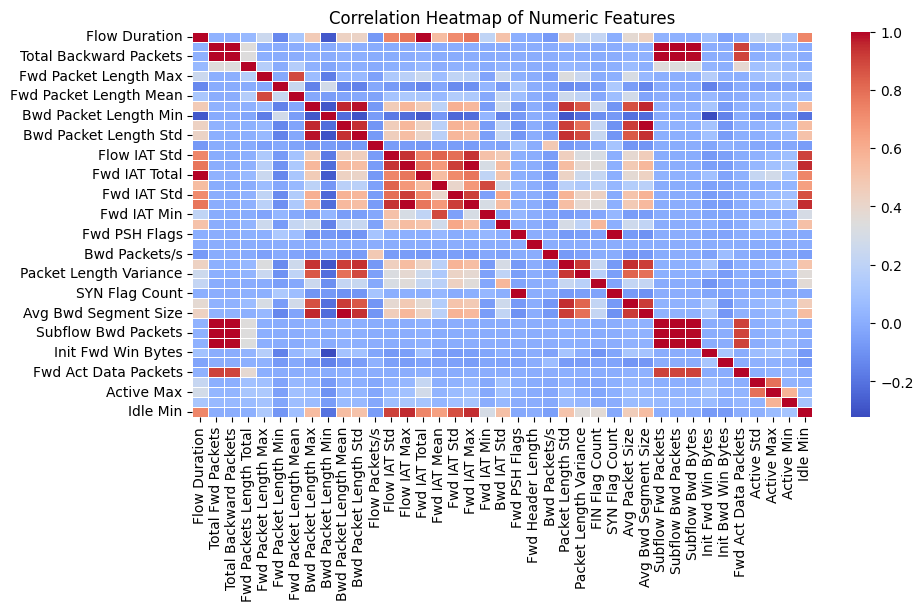

In [47]:
plt.figure(figsize=(10,5))
corr = X_trainb_sel_df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show() 

In [48]:
print(X_trainb_sel_df.columns.tolist())


['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Packets/s', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Std', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Packets/s', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'Avg Packet Size', 'Avg Bwd Segment Size', 'Subflow Fwd Packets', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init Fwd Win Bytes', 'Init Bwd Win Bytes', 'Fwd Act Data Packets', 'Active Std', 'Active Max', 'Active Min', 'Idle Min']


In [51]:
to_drop = ['Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
            'Subflow Fwd Packets', 'Active Min', 'Flow IAT Std']

X_trainb_sel_df = X_trainb_sel_df.drop(columns=to_drop)
X_valb_sel_df   = X_valb_sel_df.drop(columns=to_drop)
X_testb_sel_df  = X_testb_sel_df.drop(columns=to_drop)

KeyError: "['Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Subflow Fwd Packets', 'Active Min', 'Flow IAT Std'] not found in axis"

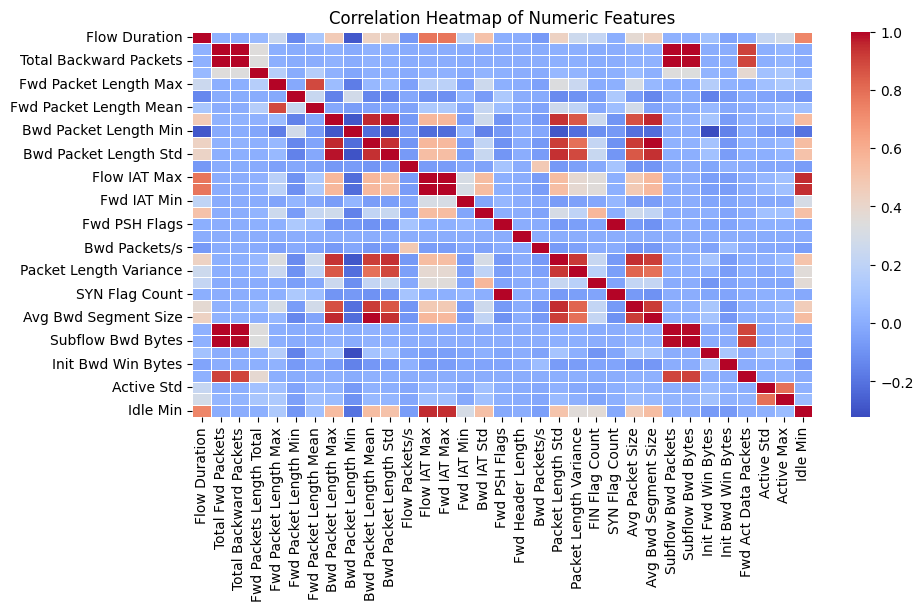

In [50]:
plt.figure(figsize=(10,5))
corr = X_trainb_sel_df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show() 

## ***1.6.2 Multiclass***

In [52]:
xgb_fs = xgb.XGBClassifier(
    n_estimators=50,       
    max_depth=3,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=0.5,
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_fs.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=-1, num_parallel_tree=None, objective='multi:softprob', ...)

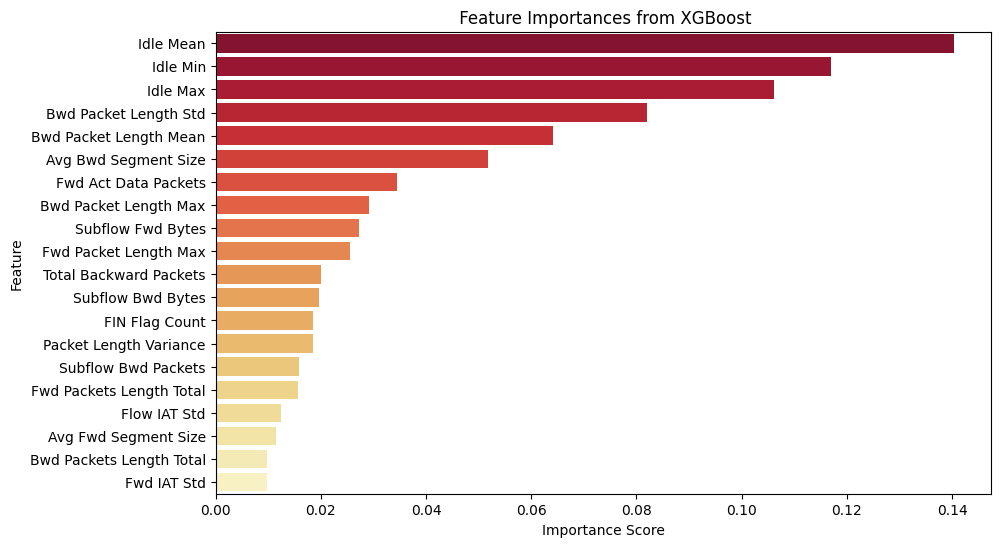

In [53]:
feat_importances = pd.DataFrame({"Feature": x_train.columns,"Importance":
                                 xgb_fs.feature_importances_})

feat_importances = feat_importances.sort_values(by="Importance", ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importances.head(20), x="Importance", y="Feature", palette=colors)
plt.title(" Feature Importances from XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [54]:

selector = SelectFromModel(xgb_fs, threshold="median", prefit=True)

X_train_sel = selector.transform(x_train)
X_val_sel   = selector.transform(x_val)
X_test_sel  = selector.transform(x_test)

selected_features = x_train.columns[selector.get_support()]

X_train_sel_df = pd.DataFrame(X_train_sel, columns=selected_features)
X_val_sel_df = pd.DataFrame(X_val_sel, columns=selected_features)
X_test_sel_df = pd.DataFrame(X_test_sel, columns=selected_features)


print("Original feature count:", x_train.shape[1])
print("Reduced feature count:", X_train_sel.shape[1])


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Original feature count: 77
Reduced feature count: 39


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [55]:
to_drop = ['Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
            'Subflow Bwd Packets', 'Flow IAT Std']

X_train_sel_df = X_train_sel_df.drop(columns=to_drop)
X_val_sel_df   = X_val_sel_df .drop(columns=to_drop)
X_test_sel_df  = X_test_sel_df.drop(columns=to_drop)

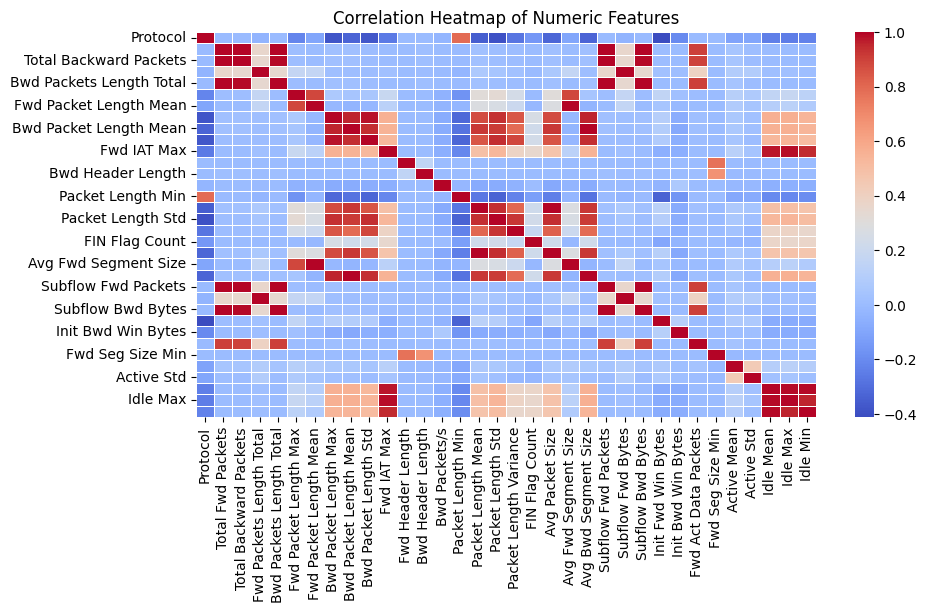

In [56]:
plt.figure(figsize=(10,5))
corr = X_train_sel_df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show() 

# ***1.7 Scaling***

## ***1.7.1 Binary classification***

In [57]:
scaler_bin = MinMaxScaler()
X_train_bin_scaled = scaler_bin.fit_transform(X_trainb_sel_df)
X_val_bin_scaled   = scaler_bin.transform(X_valb_sel_df)
X_test_bin_scaled  = scaler_bin.transform(X_testb_sel_df)

## ***1.7.2 Multi Classification***

In [58]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_sel_df)
X_val_scaled   = scaler.transform(X_val_sel_df)
X_test_scaled  = scaler.transform(X_test_sel_df)

# ***1.8 Balancing***

## ***1.8.1 Binary classification***

In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_bin_scaled, y_train_b)

print("Before SMOTE:", y_train_b.value_counts())
print("After SMOTE:", y_train_smote.value_counts())


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ff04a236840>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


Before SMOTE: Label
0    1326720
1     235544
Name: count, dtype: int64
After SMOTE: Label
0    1326720
1    1326720
Name: count, dtype: int64


## ***1.8.2 Multiclassification*** 

In [60]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# X_val_smote = X_val_scaled
# y_val_smote = y_val

# ***2 Model training***

# ***2.1 Binary classification***

## ***2.1.1 Classification Models***

### ***A.Logestic regression***

 * Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95    170579
           1       0.67      0.94      0.78     30284

    accuracy                           0.92    200863
   macro avg       0.83      0.93      0.87    200863
weighted avg       0.94      0.92      0.93    200863



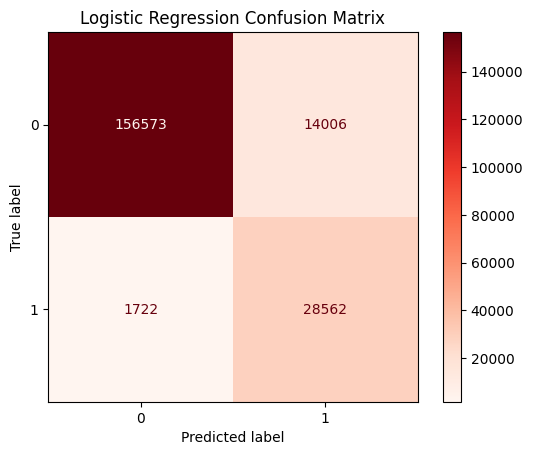

In [61]:
log_reg_pipeline = Pipeline([
    ('model', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])

log_reg_pipeline.fit(X_train_smote, y_train_smote)
y_pred_lr = log_reg_pipeline.predict(X_test_bin_scaled)

print(" * Logistic Regression Report:")
print(classification_report(y_test_b, y_pred_lr))
ConfusionMatrixDisplay.from_estimator(log_reg_pipeline, X_test_bin_scaled, y_test_b, cmap='Reds')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

 * ***The Logistic Regression model***: shows high accuracy (93%), but its performance is unbalanced: it detects most attacks (high recall) but misclassifies many normal samples as attacks (low precision). This indicates underfitting / high bias, meaning the model is too simple for the dataset. More complex models handle the data better.

### ***b.Random forest***

Cross-Validation Results 3:
Accuracy: 0.999 ± 0.000
Precision (macro): 0.999
Recall (macro): 0.999
F1-score (macro): 0.999
--------------------------------------------------
Random Forest Report on Test Set:
              precision    recall  f1-score   support

           0      1.000     0.999     0.999    170579
           1      0.993     0.999     0.996     30284

    accuracy                          0.999    200863
   macro avg      0.996     0.999     0.998    200863
weighted avg      0.999     0.999     0.999    200863



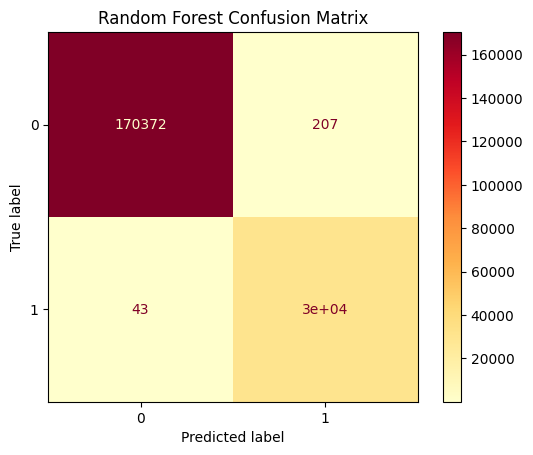

In [62]:

rf_pipeline = Pipeline([
    ('model', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced_subsample'
    ))
])


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(
    rf_pipeline, 
    X_train_smote, 
    y_train_smote, 
    cv=cv,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    n_jobs=-1,
    return_train_score=False
)


print("Cross-Validation Results 3:")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.3f} ± {np.std(cv_results['test_accuracy']):.3f}")
print(f"Precision (macro): {np.mean(cv_results['test_precision_macro']):.3f}")
print(f"Recall (macro): {np.mean(cv_results['test_recall_macro']):.3f}")
print(f"F1-score (macro): {np.mean(cv_results['test_f1_macro']):.3f}")
print("-" * 50)

rf_pipeline.fit(X_train_smote, y_train_smote)


y_pred_rf = rf_pipeline.predict(X_test_bin_scaled)

print("Random Forest Report on Test Set:")
print(classification_report(y_test_b, y_pred_rf, digits=3))


ConfusionMatrixDisplay.from_estimator(rf_pipeline, X_test_bin_scaled, y_test_b, cmap='YlOrRd')
plt.title("Random Forest Confusion Matrix")
plt.show()


### ***c.XGboost***

In [63]:

xgb_model = XGBClassifier(
    n_estimators=200,     
    learning_rate=0.05,   
    max_depth=3,          
    min_child_weight=5,   
    subsample=0.7, 
    colsample_bytree=0.7,
    reg_alpha=1,          
    reg_lambda=1,         
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(
    X_train_smote, 
    y_train_smote,
    eval_set=[(X_test_bin_scaled, y_test_b)],
    early_stopping_rounds=10,
    verbose=True
)

y_pred_xgb = xgb_model.predict(X_test_bin_scaled)

val_accuracy = accuracy_score(y_test_b, y_pred_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.65331
[1]	validation_0-logloss:0.61689
[2]	validation_0-logloss:0.58355
[3]	validation_0-logloss:0.55214
[4]	validation_0-logloss:0.52405
[5]	validation_0-logloss:0.49809
[6]	validation_0-logloss:0.47415
[7]	validation_0-logloss:0.45166
[8]	validation_0-logloss:0.43102
[9]	validation_0-logloss:0.41211
[10]	validation_0-logloss:0.39405
[11]	validation_0-logloss:0.37744
[12]	validation_0-logloss:0.36181
[13]	validation_0-logloss:0.34656
[14]	validation_0-logloss:0.33246
[15]	validation_0-logloss:0.31990
[16]	validation_0-logloss:0.30753
[17]	validation_0-logloss:0.29598
[18]	validation_0-logloss:0.28508
[19]	validation_0-logloss:0.27529
[20]	validation_0-logloss:0.26533
[21]	validation_0-logloss:0.25617
[22]	validation_0-logloss:0.24761
[23]	validation_0-logloss:0.23973
[24]	validation_0-logloss:0.23205
[25]	validation_0-logloss:0.22478
[26]	validation_0-logloss:0.21786
[27]	validation_0-logloss:0.21161
[28]	validation_0-logloss:0.20525
[29]	validation_0-loglos

 * XGBoost Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170579
           1       0.98      0.99      0.98     30284

    accuracy                           0.99    200863
   macro avg       0.99      0.99      0.99    200863
weighted avg       0.99      0.99      0.99    200863

Validation Accuracy: 0.9945136734988524


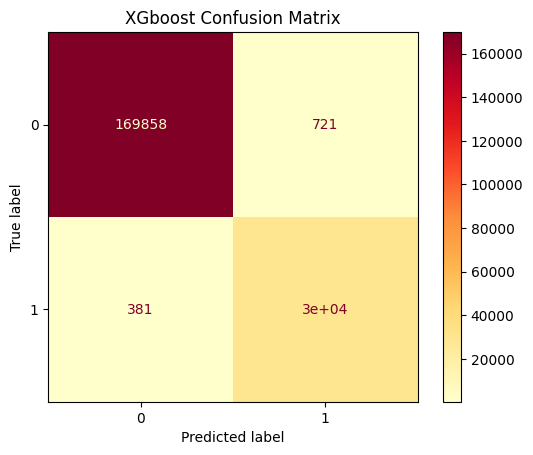

In [64]:
print(" * XGBoost Report:")
print(classification_report(y_test_b, y_pred_xgb))
print("Validation Accuracy:", val_accuracy)
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_bin_scaled, y_test_b, cmap='YlOrRd')
plt.title("XGboost Confusion Matrix")
plt.show()

## ***2.1.2 MLP model***

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve
)
import numpy as np
import matplotlib.pyplot as plt

In [69]:
n_features = X_train_smote.shape[1]

# if X_val_smote has more col
if X_val_smote.shape[1] > n_features:
    X_val_smote = X_val_smote[:, :n_features]

# X_val_smote has less col
elif X_val_smote.shape[1] < n_features:
    n_missing = n_features - X_val_smote.shape[1]
    X_val_smote = np.hstack([X_val_smote, np.zeros((X_val_smote.shape[0], n_missing))])

print("X_val_smote.shape:", X_val_smote.shape)

model = Sequential([
    Input(shape=(n_features,)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()

NameError: name 'X_val_smote' is not defined

In [75]:
# تعديل شات جيبوتي 

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
# تأكيد عدد الأعمدة
n_features = X_train_smote.shape[1]
X_val_smote = X_val_bin_scaled.copy()

if X_val_smote.shape[1] > n_features:
    X_val_smote = X_val_smote[:, :n_features]
elif X_val_smote.shape[1] < n_features:
    n_missing = n_features - X_val_smote.shape[1]
    X_val_smote = np.pad(X_val_smote, ((0, 0), (0, n_missing)), mode='constant')

print("X_val_smote.shape:", X_val_smote.shape)

# بناء النموذج
model = Sequential([
   InputLayer(shape=(n_features,)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()


X_val_smote.shape: (468679, 33)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,713 (202.00 KB)

 Trainable params: 50,817 (198.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [76]:
print("X_train_smote.shape:", X_train_smote.shape)
print("X_val_smote.shape:", X_val_smote.shape)


X_train_smote.shape: (2653440, 33)
X_val_smote.shape: (468679, 33)


In [77]:
history = model.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_val_smote, y_val_smote),
    epochs=40,
    batch_size=512,
    verbose=2
)

NameError: name 'y_val_smote' is not defined

In [ ]:
y_proba = model.predict(X_test_bin_scaled)
y_pred = (y_proba >= 0.5).astype(int)

print("\n ROC AUC:", roc_auc_score(y_test_b, y_proba))
print("\n Confusion Matrix:")
print(confusion_matrix(y_test_b, y_pred))
print("\n Classification Report:")
print(classification_report(y_test_b, y_pred))

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
# models = {
#     "MLP_1_small": MLPClassifier(hidden_layer_sizes=(64, 32),
#                                  activation='relu',
#                                  solver='adam',
#                                  max_iter=200,
#                                  random_state=42),

#     "MLP_2_medium": MLPClassifier(hidden_layer_sizes=(128, 64, 32),
#                                   activation='relu',
#                                   solver='adam',
#                                   max_iter=250,
#                                   random_state=42),

#     "MLP_3_deep": MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32),
#                                 activation='relu',
#                                 solver='adam',
#                                 max_iter=300,
#                                 random_state=42),

#     "MLP_4_tanh": MLPClassifier(hidden_layer_sizes=(128, 64, 32),
#                                 activation='tanh',
#                                 solver='adam',
#                                 max_iter=250,
#                                 random_state=42),

#     "MLP_5_sgd": MLPClassifier(hidden_layer_sizes=(128, 64, 32),
#                                activation='relu',
#                                solver='sgd',
#                                learning_rate_init=0.01,
#                                momentum=0.9,
#                                max_iter=300,
#                                random_state=42)
# }
 
# results = []

# for name, model in models.items():
#     print(f"\n Training {name} ...")
#     model.fit(X_train_bal, y_train_bal)

#     y_pred = model.predict(X_test)

#     acc = accuracy_score(y_test, y_pred)
#     print(f" {name} Accuracy: {acc:.4f}")

#     results.append({
#         "Model": name,
#         "Accuracy": acc
#     })

#     print("\nClassification Report:\n", classification_report(y_test, y_pred))
#     print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 
# results_df = pd.DataFrame(results)
# print("\n Model Comparison:\n")
# print(results_df.sort_values(by="Accuracy", ascending=False))

In [ ]:
# fig, axes = plt.subplots(3, 2, figsize=(12, 12))
# axes = axes.flatten()

# for i, (name, cm) in enumerate(conf_matrices.items()):
#     sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrRd", ax=axes[i])
#     axes[i].set_title(f"{name}")
#     axes[i].set_xlabel("Predicted Label")
#     axes[i].set_ylabel("True Label")

# # Remove extra subplot if models < 6
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.suptitle("Confusion Matrices for All MLP Models", fontsize=16, y=1.02)
# plt.show()

# ***2.2 Multiclassification***

## ***2.2.1 Classification Models***

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### ***A. Random forest***

In [ ]:

rf_pipeline = Pipeline([
    ('model', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced_subsample',
        n_jobs=2    

    ))
])

print("\n===== Random Forest Cross-Validation =====")
rf_cv_results = cross_validate(
    rf_pipeline,
    X_train_bal,
    y_train_bal,
    cv=cv,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    n_jobs=-1,
    return_train_score=False
)



In [ ]:

print(f"Accuracy: {np.mean(rf_cv_results['test_accuracy']):.3f} ± {np.std(rf_cv_results['test_accuracy']):.3f}")
print(f"Precision (macro): {np.mean(rf_cv_results['test_precision_macro']):.3f}")
print(f"Recall (macro): {np.mean(rf_cv_results['test_recall_macro']):.3f}")
print(f"F1-score (macro): {np.mean(rf_cv_results['test_f1_macro']):.3f}")

rf_pipeline.fit(X_train_bal, y_train_bal)
y_pred_rf = rf_pipeline.predict(X_test_scaled)

print("\nRandom Forest Classification Report (Test Set):")
print(classification_report(y_test, y_pred_rf, digits=3))

ConfusionMatrixDisplay.from_estimator(rf_pipeline, X_test_scaled, y_test, cmap='YlOrRd')
plt.title("Random Forest Confusion Matrix")
plt.show()

### ***B. XGBoost***

In [ ]:
xgb_pipeline = Pipeline([
    ('model', XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='multi:softprob',   
        eval_metric='logloss',
        scale_pos_weight=1,
        random_state=42,
        use_label_encoder=False,
        n_jobs=2  

    ))
])

print("\n===== XGBoost Cross-Validation =====")
xgb_cv_results = cross_validate(
    xgb_pipeline,
    X_train_bal,
    y_train_bal,
    cv=cv,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    n_jobs=-1,
    return_train_score=False
)



In [ ]:
print(f"Accuracy: {np.mean(xgb_cv_results['test_accuracy']):.3f} ± {np.std(xgb_cv_results['test_accuracy']):.3f}")
print(f"Precision (macro): {np.mean(xgb_cv_results['test_precision_macro']):.3f}")
print(f"Recall (macro): {np.mean(xgb_cv_results['test_recall_macro']):.3f}")
print(f"F1-score (macro): {np.mean(xgb_cv_results['test_f1_macro']):.3f}")

xgb_pipeline.fit(X_train_bal, y_train_bal)
y_pred_xgb = xgb_pipeline.predict(X_test_scaled)

print("\nXGBoost Classification Report (Test Set):")
print(classification_report(y_test_b, y_pred_xgb, digits=3))

ConfusionMatrixDisplay.from_estimator(xgb_pipeline, X_test_scaled, y_test, cmap='YlOrRd')
plt.title("XGBoost Confusion Matrix")
plt.show()

## ***2.2.3 MLP Model***

In [ ]:

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(15, activation='softmax')  
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)


In [ ]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)
